# MINI PROJECT(190819)
## CIFAR-100 분류하기

In [1]:
# need library
import numpy as np
import tensorflow as tf

# keras
from keras.models import Sequential
from keras.layers import Dense

# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# 데이터 전처리
from keras.datasets import cifar100
(X_train, y_train0), (X_test, y_test0) = cifar100.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

169009152/169001437 [==============================] - 6s 0us/step
(50000, 32, 32, 3) uint8
(50000, 1) int64
(10000, 32, 32, 3) uint8
(10000, 1) int64


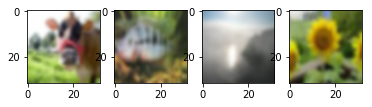

In [3]:
# 데이터 확인
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [4]:
# 데이터 변환 및 정규화
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32


In [5]:
# one-hot-encoding
print(min(y_train0),max(y_train0))

[0] [99]


In [6]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 100)
Y_test = np_utils.to_categorical(y_test0, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [7]:
# modeling
import os
import sys

# keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [8]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [9]:
# 컨볼루션 신경망의 설정
model = Sequential()

In [10]:
# 마스크 갯수, 마스크의 크기, 입력되는 값 및 색상, 활성화 함수
model.add(Conv2D(128, kernel_size=(5, 5), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
__________

In [11]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 모델 최적화 설정
MODEL_DIR = 'model100//'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="model100//{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

In [13]:
# training
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=50, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 32s 642us/step - loss: 4.6090 - acc: 0.0089 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00001: val_loss improved from inf to 4.60518, saving model to model100//01-4.6052.hdf5
Epoch 2/50
50000/50000 [==============================] - 29s 571us/step - loss: 4.6059 - acc: 0.0087 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00002: val_loss improved from 4.60518 to 4.60518, saving model to model100//02-4.6052.hdf5
Epoch 3/50
50000/50000 [==============================] - 29s 571us/step - loss: 4.6061 - acc: 0.0089 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00003: val_loss improved from 4.60518 to 4.60518, saving model to model100//03-4.6052.hdf5
Epoch 4/50
50000/50000 [==============================] - 29s 571us/step - loss: 4.6058 - acc: 0.0092 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00004: val_loss did not improve from 4.60518
Epoch 5/50
50000/50000 [============================

50000/50000 [==============================] - 28s 564us/step - loss: 4.6058 - acc: 0.0081 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00043: val_loss did not improve from 4.60518
Epoch 44/50
50000/50000 [==============================] - 28s 565us/step - loss: 4.6058 - acc: 0.0091 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00044: val_loss did not improve from 4.60518
Epoch 45/50
50000/50000 [==============================] - 28s 565us/step - loss: 4.6058 - acc: 0.0082 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00045: val_loss did not improve from 4.60518
Epoch 46/50
50000/50000 [==============================] - 28s 570us/step - loss: 4.6058 - acc: 0.0091 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00046: val_loss did not improve from 4.60518
Epoch 47/50
50000/50000 [==============================] - 28s 564us/step - loss: 4.6058 - acc: 0.0088 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00047: val_loss did not improve from 4.60518
Epoch 48/50
50000/50000 [===========================

In [14]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 217us/step

 Test Accuracy: 0.0100


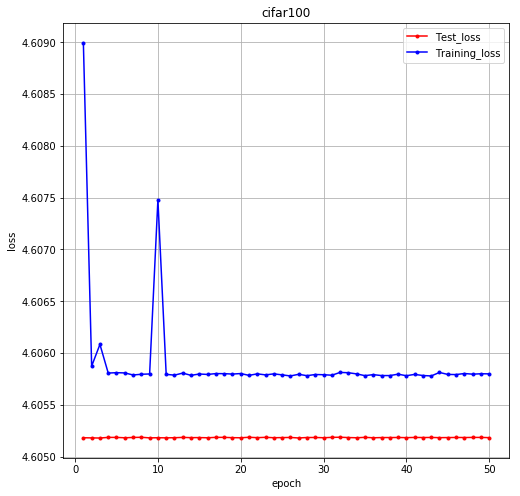

In [15]:
# 그래프 
import matplotlib.pyplot as plt
%matplotlib inline
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(1,len(y_loss)+1)

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Training_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('cifar100')
plt.show()